# Data Preprocessing

In [1]:
# Imports 
# open folder
from os import makedirs
from os import listdir
import os
from shutil import copyfile

# open image
import cv2
from PIL import Image

# random 
from random import seed
from random import random

# basic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# image augmentation
import albumentations as A

In [2]:
import pandas as pd
import os
from shutil import copyfile

In [3]:
# Load the Excel file into a DataFrame
csv_file_path = "C:\\Users\\HP\\Desktop\\Data\\pcos_reseach\\pcos_dataset\\class_label.csv"
df = pd.read_csv(csv_file_path)

In [4]:
# Display the number of images in the dataset
total_images = len(df)
print(f"Total number of images in the dataset: {total_images}")

Total number of images in the dataset: 3200


In [5]:
# Create folders for healthy and unhealthy images
healthy_folder = r"C:\Users\HP\Desktop\Data\pcos_reseach\pcos_dataset_new\Healthy Images"
unhealthy_folder = r"C:\Users\HP\Desktop\Data\pcos_reseach\pcos_dataset_new\Unhealthy Images"

os.makedirs(healthy_folder, exist_ok=True)
os.makedirs(unhealthy_folder, exist_ok=True)

In [10]:
# Copy images to their respective folders
for index, row in df.iterrows():
    image_path = row['imagePath']
    label = row['Healthy']
    
    if label == 1:
        destination_folder = healthy_folder
    else:
        destination_folder = unhealthy_folder
    
    source_path = os.path.join(r'C:\Users\HP\Desktop\Data\pcos_reseach\pcos_dataset\images', image_path)
    destination_path = os.path.join(destination_folder, image_path)
    
    # Copy the image to the destination folder
    copyfile(source_path, destination_path)


In [6]:
# Display the number of images in each folder
healthy_images = len(os.listdir(healthy_folder))
unhealthy_images = len(os.listdir(unhealthy_folder))

print(f"Number of healthy images: {healthy_images}")
print(f"Number of unhealthy images: {unhealthy_images}")

Number of healthy images: 903
Number of unhealthy images: 2297


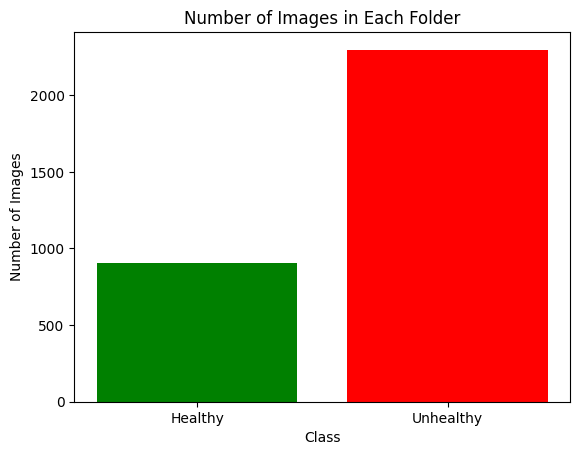

In [7]:
# Plotting the number of images in each folder
labels = ['Healthy', 'Unhealthy']
values = [healthy_images, unhealthy_images]

plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Folder')
plt.show()

## Image Augmentation

In [8]:
# image augmentation flip horizontal(mirror) image 
transform_flip = A.Compose([A.HorizontalFlip(always_apply=True)])

In [9]:
# image augmentation add gaussian noise and decrease brightness
transform_noise = A.Compose([A.GaussNoise(var_limit=(100,200),
                                         mean=-30,
                                         p=1.0)])

In [12]:
# Image augmentation with brightness increase
transform_brightness = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=(0.1, 0.3), contrast_limit=0, p=1.0)])

In [11]:
# image augmentation rotation image 45 degree angle, rescale 10% and shift 0.062%
transform_shift = A.Compose([A.ShiftScaleRotate(shift_limit=(0.0625, 0.0625), 
                                                scale_limit=(0.1, 0.1), 
                                                rotate_limit=(45, 45),
                                                p=1.0)])

In [43]:
# Image augmentation - Zoom
transform_zoom = A.Compose([A.ShiftScaleRotate(scale_limit=(0.5, 0.8), p=1.0)])

In [14]:
# Image augmentation - Elastic Deformations
transform_elastic = A.Compose([A.ElasticTransform(alpha=120, sigma=120 * 0.05, p=1.0)])

In [52]:
# open sample image data
image = cv2.imread(r"C:\Users\HP\Desktop\Data\pcos_reseach\pcos_dataset_new\Healthy Images\2image37.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to pixel numpy array

In [53]:
transformed_flip = transform_flip(image=image)['image']
transformed_noise = transform_noise(image=image)['image']
transformed_brightness= transform_brightness(image=image)['image']
transformed_zoom = transform_zoom(image=image)['image']

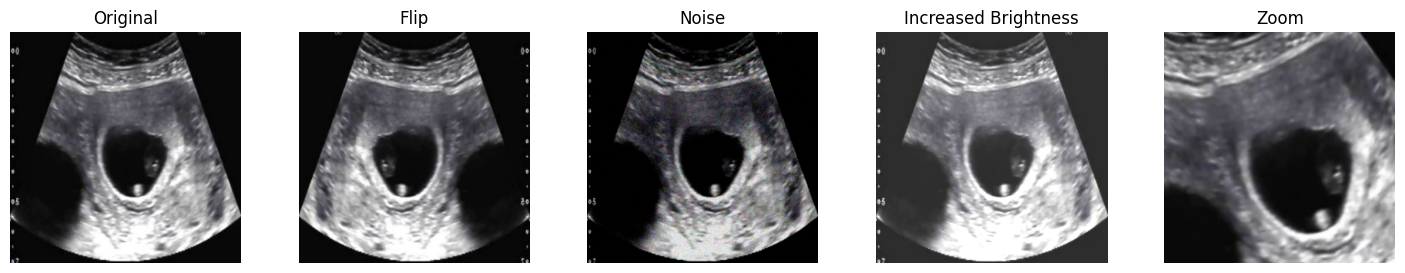

In [54]:
import matplotlib.pyplot as plt

# Assuming you have the following images: image, transformed_flip, transformed_shift, transformed_noise, transformed_zoom, transformed_skew

# Set the figure size for all images
fig, axes = plt.subplots(1, 5, figsize=(18, 3))  # Adjust the number of subplots to match the number of images

# Display the original image
axes[0].imshow(image)
axes[0].set_title("Original", size=12)
axes[0].axis("off")

# Display the transformed images
images = [transformed_flip, transformed_noise, transformed_brightness, transformed_zoom ]
titles = ["Flip", "Noise", "Increased Brightness", "Zoom"]

for i, (img, title) in enumerate(zip(images, titles), start=1):
    axes[i].imshow(img)
    axes[i].set_title(title, size=12)
    axes[i].axis("off")

plt.show()

## Uniform Class Distribution and Increase Dataset

In [46]:
import cv2
from os import listdir
import os

src_directory = r"C:\Users\HP\Desktop\Data\pcos_reseach\pcos_dataset_new\Healthy Images"

# Loop through each file in the directory
for file in sorted(listdir(src_directory)):
    try:
        # Construct the full file path using os.path.join
        file_path = os.path.join(src_directory, file)

        # Read the image
        image = cv2.imread(file_path)
        
        if image is None:
            raise Exception(f"Error: Unable to read image file '{file}'")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply transformations
        transformed_flip = transform_flip(image=image)['image']
        transformed_brightness = transform_brightness(image=image)['image']
        transformed_noise = transform_noise(image=image)['image']
        transformed_zoom = transform_zoom(image=image)['image']
        
        # Save augmented images with different filenames
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_flip.jpg"), cv2.cvtColor(transformed_flip, cv2.COLOR_RGB2BGR))
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_brightness.jpg"), cv2.cvtColor(transformed_brightness, cv2.COLOR_RGB2BGR))
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_noise.jpg"), cv2.cvtColor(transformed_noise, cv2.COLOR_RGB2BGR))
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_zoom.jpg"), cv2.cvtColor(transformed_zoom, cv2.COLOR_RGB2BGR))
    
    except Exception as e:
        print(f"Error processing file '{file}': {e}")


In [47]:
import cv2
from os import listdir
import os

src_directory = r"C:\Users\HP\Desktop\Data\pcos_reseach\pcos_dataset_new\Unhealthy Images"

# Loop through each file in the directory
for file in sorted(listdir(src_directory)):
    try:
        # Construct the full file path using os.path.join
        file_path = os.path.join(src_directory, file)

        # Read the image
        image = cv2.imread(file_path)
        
        if image is None:
            raise Exception(f"Error: Unable to read image file '{file}'")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply transformations
        transformed_flip = transform_flip(image=image)['image']
        
        # Save augmented images with different filenames
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_flip.jpg"), cv2.cvtColor(transformed_flip, cv2.COLOR_RGB2BGR))
    
    except Exception as e:
        print(f"Error processing file '{file}': {e}")


In [48]:
# Display the number of images in each folder
healthy_images = len(os.listdir(healthy_folder))
unhealthy_images = len(os.listdir(unhealthy_folder))

print(f"Number of healthy images: {healthy_images}")
print(f"Number of unhealthy images: {unhealthy_images}")

Number of healthy images: 4515
Number of unhealthy images: 4594


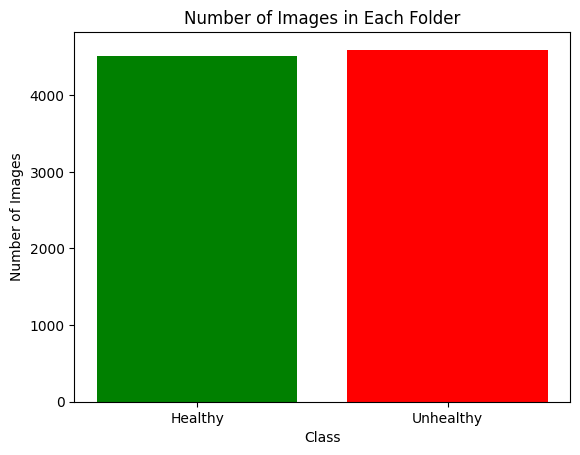

In [49]:
# Plotting the number of images in each folder
labels = ['Healthy', 'Unhealthy']
values = [healthy_images, unhealthy_images]

plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Folder')
plt.show()

In [55]:
print(f"Total number of images in the dataset: {healthy_images+unhealthy_images}")

Total number of images in the dataset: 9109
